In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ECOMMERCE_PRICE.csv')

In [5]:
df

,WEBSITES,CATEGORY,SUB-CATEGORY,PRODUCT NAME,SPECIFICATIONS,COLOR,PRICE,DISCOUNT,BRAND,TYPE
0,AMAZON,ELECTRONICS,PHONE,IPHONE-6,32GB,GOLD,30780,7,IPHONE,GADGET
1,AMAZON,ELECTRONICS,PHONE,IPHONE-6,32GB,SILVER,30780,7,IPHONE,GADGET
2,AMAZON,ELECTRONICS,PHONE,IPHONE-6,64GB,GOLD,60000,5,IPHONE,GADGET
3,AMAZON,ELECTRONICS,PHONE,IPHONE-6,64GB,SILVER,60000,5,IPHONE,GADGET
4,AMAZON,ELECTRONICS,PHONE,IPHONE-6,64GB,GRAY,60000,5,IPHONE,GADGET
...,...,...,...,...,...,...,...,...,...,...
490,FLIPKART,ELECTRONICS,TV,SAMSUNG AMOLED B,80CM,BLACK,30250,30,SAMSUNG,HOME APPLIENCES
491,FLIPKART,ELECTRONICS,TV,SAMSUNG ULTRA,108CM,BLACK,36400,25,SAMSUNG,HOME APPLIENCES
492,FLIPKART,ELECTRONICS,TV,SAMSUNG ULTRA PRO,108CM,BLACK,85600,35,SAMSUNG,HOME APPLIENCES
493,FLIPKART,ELECTRONICS,TV,SAMSUNG THE FRAME,138CM,BLACK,92600,25,SAMSUNG,HOME APPLIENCES


In [7]:
df.isnull().sum()

WEBSITES            0
CATEGORY            0
SUB-CATEGORY        0
PRODUCT NAME        0
SPECIFICATIONS    189
COLOR               0
PRICE               0
DISCOUNT            0
BRAND               0
TYPE                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WEBSITES        495 non-null    object
 1   CATEGORY        495 non-null    object
 2   SUB-CATEGORY    495 non-null    object
 3   PRODUCT NAME    495 non-null    object
 4   SPECIFICATIONS  306 non-null    object
 5   COLOR           495 non-null    object
 6   PRICE           495 non-null    int64 
 7   DISCOUNT        495 non-null    int64 
 8   BRAND           495 non-null    object
 9   TYPE            495 non-null    object
dtypes: int64(2), object(8)
memory usage: 38.8+ KB


In [13]:
# Fill null values in 'SPECIFICATIONS' column with 'N/A'
df['SPECIFICATIONS'] = df['SPECIFICATIONS'].fillna('N/A')

In [15]:
df.isnull().sum()

WEBSITES          0
CATEGORY          0
SUB-CATEGORY      0
PRODUCT NAME      0
SPECIFICATIONS    0
COLOR             0
PRICE             0
DISCOUNT          0
BRAND             0
TYPE              0
dtype: int64

In [17]:
df.describe()

,PRICE,DISCOUNT
count,495.000000,495.000000
mean,56287.238384,25.553535
std,43393.284338,13.186020
min,6499.000000,5.000000
25%,30885.000000,15.000000
50%,42500.000000,25.000000
75%,74400.000000,32.000000
max,262500.000000,57.000000


In [37]:
df['WEBSITES'].value_counts()

WEBSITES
AMAZON       165
FLIPKART     147
EBAY         147
FLIPKART      36
Name: count, dtype: int64

In [39]:
# Convert all values in 'WEBSITES' column to uppercase and strip any whitespace
df['WEBSITES'] = df['WEBSITES'].str.upper().str.strip()

In [41]:
df['WEBSITES'].value_counts()

WEBSITES
FLIPKART    183
AMAZON      165
EBAY        147
Name: count, dtype: int64

In [43]:
# Brand presence across websites (optional pivot)
brand_website_counts = df.pivot_table(index='BRAND', columns='WEBSITES', values='PRODUCT NAME', aggfunc='count', fill_value=0)

In [45]:
brand_website_counts 

WEBSITES,AMAZON,EBAY,FLIPKART
BRAND,,,
APPLE,24,24,24
DELL,20,20,20
HP,19,19,19
IPHONE,47,47,47
LG,24,24,24
READMI,3,3,3
SAMSUNG,28,10,46


In [47]:
df.columns

Index(['WEBSITES', 'CATEGORY', 'SUB-CATEGORY', 'PRODUCT NAME',
       'SPECIFICATIONS', 'COLOR', 'PRICE', 'DISCOUNT', 'BRAND', 'TYPE'],
      dtype='object')

In [49]:
# 1. Top 5 Deals

In [51]:
top_deals = df.sort_values(by='DISCOUNT', ascending=False)[['PRODUCT NAME', 'BRAND', 'WEBSITES', 'DISCOUNT']].head(5)
print(top_deals)

    PRODUCT NAME BRAND  WEBSITES  DISCOUNT
227   DELL WYSE   DELL  FLIPKART        57
289   DELL WYSE   DELL    AMAZON        57
290   DELL WYSE   DELL    AMAZON        57
353   DELL WYSE   DELL      EBAY        57
226   DELL WYSE   DELL  FLIPKART        57


In [53]:
expensive_product = df.sort_values(by='PRICE', ascending=False)[['PRODUCT NAME', 'BRAND', 'WEBSITES', 'PRICE']].head(5)
print(expensive_product)

                  PRODUCT NAME  BRAND WEBSITES   PRICE
326  APPLE MACKBOOK PRO M3 MAX  APPLE     EBAY  262500
261  APPLE MACKBOOK PRO M3 MAX  APPLE   AMAZON  262500
325  APPLE MACKBOOK PRO M3 MAX  APPLE     EBAY  262500
262  APPLE MACKBOOK PRO M3 MAX  APPLE   AMAZON  262500
263  APPLE MACKBOOK PRO M3 MAX  APPLE   AMAZON  262500


In [55]:
# 2. Average Discount per Website

In [57]:
avg_discount = df.groupby('WEBSITES')['DISCOUNT'].mean()
print(avg_discount)

WEBSITES
AMAZON      25.539394
EBAY        25.108844
FLIPKART    25.923497
Name: DISCOUNT, dtype: float64


In [59]:
#  3. Brand-wise Product Count

In [61]:
brand_counts = df['BRAND'].value_counts().head(10)
print(brand_counts)

BRAND
IPHONE     141
SAMSUNG     84
APPLE       72
LG          72
DELL        60
HP          57
READMI       9
Name: count, dtype: int64


In [65]:
# A. Discount Distribution

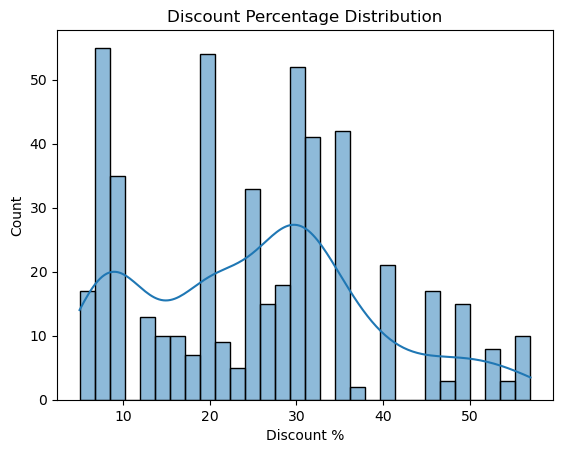

In [63]:
sns.histplot(df['DISCOUNT'], kde=True, bins=30)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.show()

In [67]:
# B. Top 10 Brands by Count

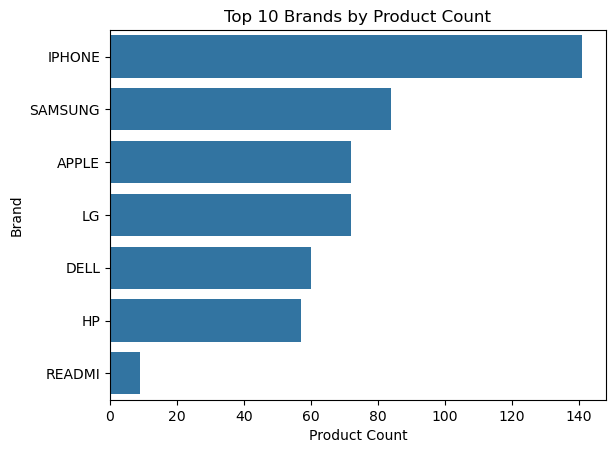

In [69]:
top_brands = df['BRAND'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Product Count')
plt.ylabel('Brand')
plt.show()

In [71]:
# C. Website-wise Avg Discount %

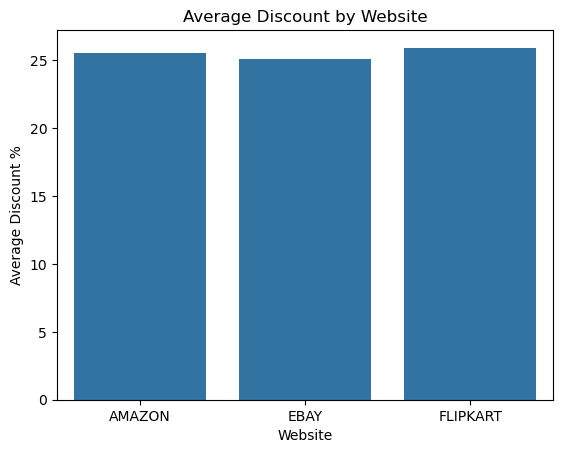

In [73]:
sns.barplot(x=avg_discount.index, y=avg_discount.values)
plt.title('Average Discount by Website')
plt.xlabel('Website')
plt.ylabel('Average Discount %')
plt.show()

In [79]:
df.columns

Index(['WEBSITES', 'CATEGORY', 'SUB-CATEGORY', 'PRODUCT NAME',
       'SPECIFICATIONS', 'COLOR', 'PRICE', 'DISCOUNT', 'BRAND', 'TYPE'],
      dtype='object')